# Loan Default & Credit Risk Prediction
### Handling Imbalanced Classification Tasks  & Interpretation of Tree Models


## Introduction

The global financial crisis and recession of 2007-2008 makes us reconsider the importance of defaults in lending businesses. The subprime mortgage crisis that resulted due to delinquencies, foreclosures and devaluation of housing securities during the housing bubble led to the global recession that shook the world.

Traditionally, heuristics have been used to determine credit eligiblity and loans used to be made based on trust. Nowadays however, lenders take default risk very seriously and have developed scientific approaches to foresee such risks. 

A lot of metrics such as different kinds of credit scores, FICO scores exist that help in credit eligibility of individuals. However, from one lending business to another, it sometimes helps to analyze the data from their own businesses to have a more customized risk prediction for that particular business. Machine learning approaches have used

Defaults in home loans result in increased scrutiny, rejection of loan requests from deserving individuals and rise in interest rates. Foreseeing and handling such risks in advance helps create a stable financial environment that leads to fair evaluation and lending processes.

## Data Sources

***Home Credit Group*** provided their anonymized home loan data in 2018 for launching a Kaggle competition and for further research in the area to encourage creation of statistical and Machine Learning solutions to the problem.

The original dataset was composed of several individual files which have been joined together appropriately to create a singular dataset with appropriate fields. The combined dataset as well as the data dictionary will be provided as part of the project documentation.

## Challenges

As with all real datasets, there are several challenges that we encounter when we attempt to clean and model the data.

- One of the biggest challenges is that the dataset is an ***Imbalanced Dataset***. The proportion of **defaulted observations comprises less than 9% of the observation volume**.
- The dataset has **High Dimensionality**. As we will see down below during exploration, the dataset has **121 independent variables or features**, which is very high.
- **Invalid/missing data** is a another issue as well. Many of the features have more than 50% of the values as nulls or missing.
- **Categorical Variables Cardinality**. Some of the catgorical variables have very high cardinality (more than 50 categories). The general approaches of one-hot encoding result in high dimensional feature space.

## Approach

- We have followed a step by step approach to handle each of the above challenges and ***demonstrated some of the best practices to handle imbalanced datasets.***
- Our focus is not just on accurate performance metrics but mainly on ***Model Interpretability*** so that it can add business value to any organization that wants to employ them into their lending business
- We have given a lot of emphasis on the concept of ***Fairness in AI*** and have purposefully left out many of the features that are protected classes (either as per US Federal or California State laws) so that our model is fair.

<br>

With these approaches in mind let us jump into the project code!



## Setting up required libraries and dependencies

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Uncomment and run below command if SHAP library is not already installed in your system
!pip install shap

In [ ]:
import shap

***Shared Google Drive View Link for the data :***          
 https://drive.google.com/drive/folders/13Z66YAnXVDJOHVgXECt4XngsIIcnxgDW?usp=sharing

***Shared Google Drive View Link for the Notebook:***    
https://colab.research.google.com/drive/18sXJuh6OOeZ049jYEzvZr_cLtSFdHI8q?usp=sharing

***Original Kaggle Link:***       
https://www.kaggle.com/c/home-credit-default-risk/data

In [ ]:
# Below code segment mounts the your google drive so that Google colab can access a dataset in your google drive
# If you are running on your local machine, please comment out the below code and point your pd.read_csv to correct local directory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Making sure Pandas displays all columns of a dataframe. 
pd.set_option('display.max_columns', None)

In [ ]:
%matplotlib inline

## Load Dataset

In [ ]:
# Load the dataset
loandata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BAX 452 Final Project/ML Project Dataset/loan_applications.csv")

## Data Exploration and Cleaning

In [ ]:
# How many observations and features do we have in our dataset?
loandata.shape

(307511, 122)

In [ ]:
# Show feature names
# Refer to the detailed data dictionary stored in google drive for detailed explanations of the features
loandata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# View a few of the observations to get an idea of the data
loandata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

We should note here that **TARGET** is our dependent variable in this dataset. This signifies whether or not the customer missed payments in the first few payable installments which indicates some form of default.

In [ ]:
# What is the number of the 0 and 1 values in the response variable in the dataset?
loandata['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
# What is the proportion of the 0 and 1 values in the response variable in the dataset?
loandata['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**As we can see, almost 92% of the data (nearly 282K observations) correspond to observations that did not default. Only 8% (nearly 25K observations) of the observations correspond to loan default, which is not unexpected, as we would expect most of the borrowers to repay their loan on schedule.** However, this clearly demonstrates that this is a highly imbalanced dataset and we need to account for this issue during modeling.


### Handling Missing Values

In [ ]:
# Display the feature names along with the number of missing values in descending order
pd.set_option('display.max_rows', 60)
loandata.isna().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
# Display the percentage of missing values along with the feature names
percent_missing = loandata.isna().sum() * 100 / len(loandata)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,percent_missing
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


Let us see if these features with high number of missing values (more than 70%) do contribute to the loan default.

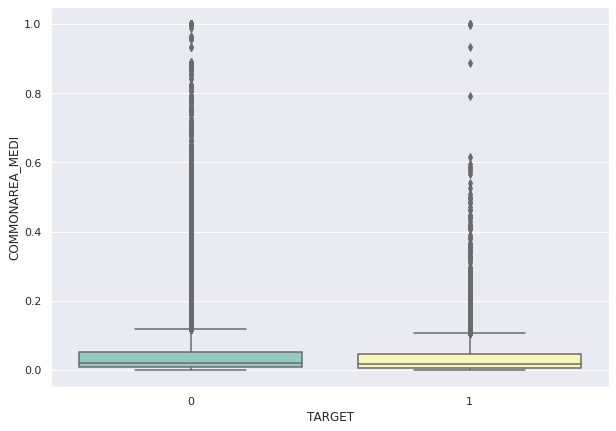

In [ ]:
# See if COMMONAREA_MEDI (with 70% missing values) exhibits enough association with our TARGET variable
sns.set(rc = {'figure.figsize':(10, 7)})
sns.boxplot(x="TARGET", y="COMMONAREA_MEDI",
                 data=loandata, palette="Set3")

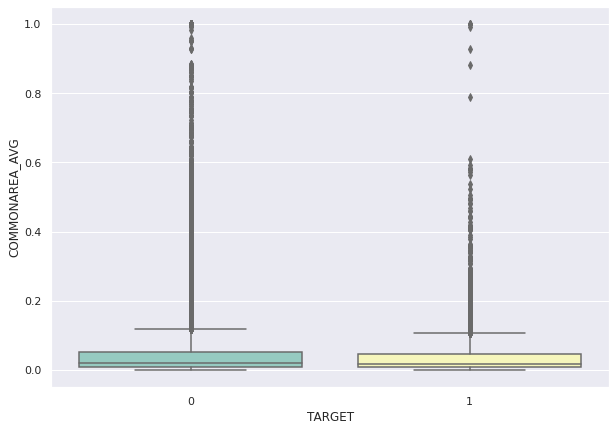

In [ ]:
# See if COMMONAREA_AVG (with 70% missing values) exhibits enough association with our TARGET variable
sns.boxplot(x="TARGET", y="COMMONAREA_AVG",
                 data=loandata, palette="Set3")

As evident from the above boxplots, these features do not vary significantly among 'default'(1) and 'not-default'(0) observations. Apart from the above two we have verified for the rest of the features with missing values as well (we are not including it in this final notebook to prevent a large number of figures) and they do not differ significantly. ***Since these features have 50-90% of the values missing, including them or even imputing median values of the target for them is only going to bias the model and cause high dimensionality***. Therefore we are taking the approach of removing the missing value columns, as we are going to see, we will have enough predictive features to work with. 

In [ ]:
# What are the features having valid values
no_missing_value_df = missing_value_df [missing_value_df.percent_missing == 0]
no_missing_value_df

,percent_missing
CNT_CHILDREN,0.0
FLAG_DOCUMENT_8,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
...,...
NAME_HOUSING_TYPE,0.0
NAME_FAMILY_STATUS,0.0
NAME_EDUCATION_TYPE,0.0
NAME_INCOME_TYPE,0.0


In [ ]:
# What is the total number of features not having missing values
len(no_missing_value_df)

55

In [ ]:
# Names of Features not having any missing values
no_missing_value_df.index

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START',
       'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'ORGANIZATION_TYPE', 'FLAG_WORK_PHONE', '

In [ ]:
# Create clean dataset without missing values
loandata_clean = loandata[no_missing_value_df.index]

In [ ]:
# Display info on the clean dataset features
loandata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 307511 non-null  int64  
 1   FLAG_DOCUMENT_8              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_DOCUMENT_2              307511 non-null  int64  
 6   FLAG_DOCUMENT_3              307511 non-null  int64  
 7   FLAG_DOCUMENT_4              307511 non-null  int64  
 8   FLAG_DOCUMENT_5              307511 non-null  int64  
 9   FLAG_DOCUMENT_6              307511 non-null  int64  
 10  FLAG_DOCUMENT_7              307511 non-null  int64  
 11  FLAG_DOCUMENT_9              307511 non-null  int64  
 12  FLAG_DOCUMENT_21             307511 non-null  int64  
 13 

## Feature Selection



1.   Handling Categorical Features
2.   Removing Uninformative Features
3.   Remove Protected Classes




In [ ]:
# Check the number of features in our clean dataset by their datatypes
loandata_clean.dtypes.value_counts()

int64      41
object     10
float64     4
dtype: int64

We can see that we have 45 features having numeric data and 10 features which are categorical. We take a closer look at these features and find that the following features can be eliminated -

 - Remove CODE_GENDER field so that our model is fair and adheres to AI ethics.
 - Remove NAME_FAMILY_STATUS (marital status) field as it is also a protected class as per California State Laws (although not as per Federal laws)
 - Remove document flags as these are logistic information that just tell us whether the customer filled up document number 7,8,9 and  so on, which do not carry sufficient predictive information. Also we do not know what these documents are, so they do not help in any kind of inference either.
 - Remove ORGANIZATION_TYPE as it is a string field that has 58 unique values (high cardinality) and one-hot encoding would cause high dimensionality (increase our dimensionality by 57)
 - Remove WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START fields as it just tells which day of the week and hour of the day the loan was applied on, which should not logically bear a relationship with loan default rate.

In [ ]:
# Make a list of features to drop
dropcols = [ 'FLAG_DOCUMENT_8', 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS', 'HOUR_APPR_PROCESS_START',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'ORGANIZATION_TYPE',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12']

In [ ]:
# Create new dataframe with unnecessary features removed
loandata_2 = loandata_clean.drop(columns = dropcols, axis=0)

In [ ]:
# Show the features 
loandata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   FLAG_OWN_REALTY              307511 non-null  object 
 3   AMT_CREDIT                   307511 non-null  float64
 4   AMT_INCOME_TOTAL             307511 non-null  float64
 5   FLAG_PHONE                   307511 non-null  int64  
 6   LIVE_CITY_NOT_WORK_CITY      307511 non-null  int64  
 7   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 8   TARGET                       307511 non-null  int64  
 9   REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 10  LIVE_REGION_NOT_WORK_REGION  307511 non-null  int64  
 11  REG_REGION_NOT_WORK_REGION   307511 non-null  int64  
 12  REG_REGION_NOT_LIVE_REGION   307511 non-null  int64  
 13 

In [ ]:
# Check feature count by data type once again
loandata_2.dtypes.value_counts()

int64      20
object      5
float64     4
dtype: int64

In [ ]:
# What are the categorical features that may need one-hot encoding?
loandata_2.dtypes[(loandata_2.dtypes == 'object')]

NAME_CONTRACT_TYPE     object
FLAG_OWN_REALTY        object
NAME_HOUSING_TYPE      object
NAME_EDUCATION_TYPE    object
NAME_INCOME_TYPE       object
dtype: object



## One-hot Encoding the Categorical Features

We verified the values of the above string fields which have relevant categories related to loan risk. So we one-hot encode these categories. This will cause some increase in dimensionality, but should contribute to the predicitive power of our model.

In [ ]:
# One-hot Encoding
loandata3 = pd.get_dummies(loandata_2)

In [ ]:
# View few observations
loandata3.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,2,2,0,1,0,1,1,-2120,-3648.0,-637,-9461,0.018801,100002,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,-291,-1186.0,-1188,-16765,0.003541,100003,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,135000.0,67500.0,1,0,0,0,0,0,0,0,2,2,0,1,1,1,1,-2531,-4260.0,-225,-19046,0.010032,100004,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,312682.5,135000.0,0,0,0,0,0,0,0,0,2,2,0,1,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,100006,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,513000.0,121500.0,0,1,1,0,0,0,0,0,2,2,0,1,0,1,1,-3458,-4311.0,-3038,-19932,0.028663,100007,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
# How many features and observations do we have after performing feature engineering and data cleaning?
loandata3.shape

(307511, 47)


We can see that after performing data cleaning and feature engineering, we have 47 independent variables (including one-hot encoded categories and about 307K observations). We have successfully reduced the dimensionality of the dataset to a level where some well-performing algorithms (like tree based algorithms) can handle them well.

## Splitting the data into Training and Test sets using a Stratified Split

Before modeling, we want to split the data into training and test. We should note here, that since we have an imbalanced dataset with less than 9% data belonging to TARGET value '1', we need to ensure that this proportion is preserved in both the training and test sets.

***This is why we use the parameter `stratify= y` that preserves the output class proportions while splitting.***

In [ ]:
# Create the X matrix of features and y vector of target variable
X = loandata3.drop('TARGET', axis=1)
y = loandata3['TARGET']

In [ ]:
# Perform the Train-Test Split with a 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
# Check proportion - training set
y_train.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [ ]:
# Check proportion - test set
y_test.value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

We can see that the splitting has been done in a stratified manner preserving the ration of 0 and 1 observations in both training and test sets.

# Fitting a Random Forest Classifier to the Imbalanced Data

In [ ]:
# Fit a baseline Random Forest Model
model_rf_baseline = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', n_jobs=-1) 
model_rf_baseline.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_jobs=-1)

In [ ]:
# Performing predictions on the test dataset
y_pred = model_rf_baseline.predict(X_test)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9192722306228964


***As we can see, the accuracy of the baseline model is 92% !, Is it really true?***

Let us have a closer look at the confusion matrix. As we can see, the model predicted almost out 4965 loans as no-default. Therefore we can clearly see that ***for imbalanced datasets, models often tend to become "percentage calculators" and always tend to predict in favour of the majority class label.***.

Therefore, although our model technically shows 91% accuracy score, we should target to improve our the ***Recall Score*** which is the **percentage of predicted positives among actual total number of positives**. For this model our recall is nearly 0%. 

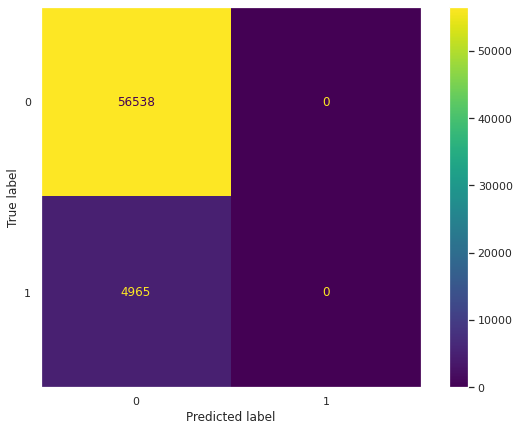

In [ ]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [ ]:
# Classification report with all the metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Using Undersampling Technique to handle imbalanced data training

As we just saw, our previous model had a recall metric of 0%, which means it could predict none of the loan default observations.

To fix this, we adopt a very commonly adopted technique to handle imbalanced datasets called ***undersampling***.

Here we randomly undersample the majority class (here no-default class) and also if needed, bootstrap from the minority class. We create resampled datasets and run the model again.

The `imblearn` library available within `sklearn` helps us do exactly this. Let us see if our ***Recall Score*** improves if we train on resampled data.

In [ ]:
# Use Undersampling to create resampled train datasets 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
# Let us check the size of the resampled datasets
print("X_resampled.shape:", X_resampled.shape)
print("y_resampled.shape:", y_resampled.shape)

X_resampled.shape: (39720, 46)
y_resampled.shape: (39720,)


In [ ]:
# What is the proportion of output classes in the resampled datasets?
y_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: TARGET, dtype: float64

We can see that the proportion of 0's and 1's in the resampled datasets is 50-50. ***So our dataset is balanced now***. Let us train a Random Forest model again on the dataset.

In [ ]:
# Fit a Random Forest classifier on resampled data
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', n_jobs=-1) 
model_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_features='sqrt', n_jobs=-1)

In [ ]:
# Performing predictions on the test dataset
y_pred = model_rf.predict(X_test)
print("Recall Score: ", recall_score(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Recall Score:  0.5899295065458208
Accuracy Score:  0.6133847129408322


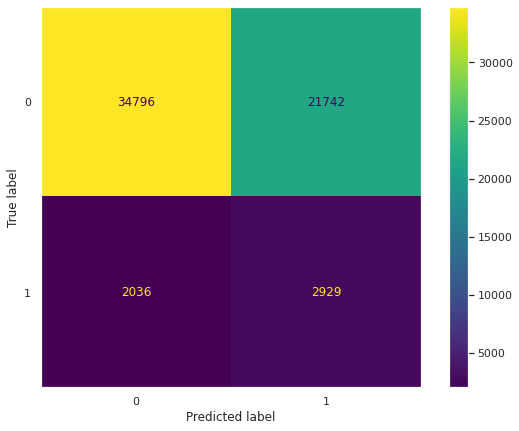

In [ ]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

We can see that after resampling and obtaining balanced dataset, the ***Recall score of the model improved from 0% to nearly 60%***. Although the overall accuracy of the model dropped from 92%, we realize that the accuracy score is misleading in case of imbalanced datasets.

The above score can be interpreted as the model being able to ***detect 60 out of 100 possible loan defaults.***

We also note that the precision of the model can be improved, as it also predicts a number of non-defaults as defaults, which can be an improvement over this model. 

## Optional Hyperparameter Tuning for Random Forest (Estimated 6 Hours Training)

The below code is for tuning hyperparameters of the Random Forest model shown above. The code has been commented out so that this notebook can be run, end to end, without significant delays in execution. Even upon hyperparameter tuning, we do not observe significant rise in performance than our model above, therefore we keep this code as an optional placeholder. ***Note : If you need to run this, please uncomment and run on google colab, instead of your personal machine, as it utilizes all CPU cores and may hang your PC/Mac.***

In [ ]:
# ############### Define the Hyperparameter Space ####################
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [ ]:
# # Use the random grid to search for best hyperparameters
# # Random search of parameters using 5 fold cross validation
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [ ]:
# rf_random.best_params_

In [ ]:
# rf_random.best_estimator_

In [ ]:
# score = cross_val_score(rf_random.best_estimator_,X_train,y_train,cv=10)
# score.mean()

In [ ]:
# # Performing predictions on the test dataset
# y_pred = rf_random.best_estimator_.predict(X_test)

# print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

## Does an XGBoost Classifier perform better?

Let us try to see by fitting another popular tree-based classifier XGBoost, to see if it does a better job than our Random Forest model. It has been known to work well for large number of features.

Note that even for XGBoost, we use the resampled datasets instead of the original. (We have tried with the original datasets as well, however it exhibits the same problems of 0% recall score and misleading 92% accuracy).

In [ ]:
# Fit an XGB classifier
model_xgb = XGBClassifier(use_label_encoder=False, n_jobs=-1) 
model_xgb.fit(X_resampled, y_resampled)

XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [ ]:
# Performing predictions on the test dataset
y_pred = model_xgb.predict(X_test)

Recall Score:  0.611681772406848
Accuracy Score:  0.6226362941645123


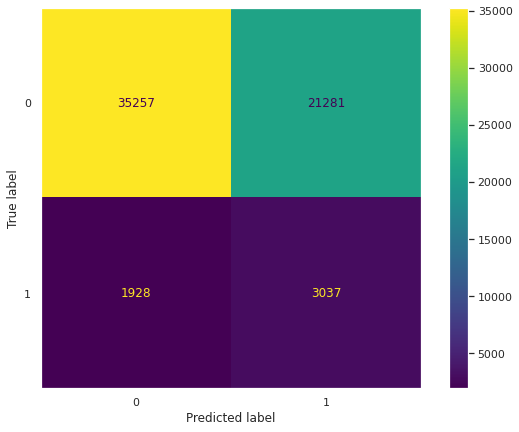

In [ ]:
# Print Recall and Accuracy
print("Recall Score: ", recall_score(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

We notice that there is only slight improvement (about 2%) in recall score when compared to the Random Forest model. This goes to show that this is the level of performance we can expect from the tree-based models (**around 60%**) on this dataset.

## Optional Hyperparameter Tuning for XGBoost (Estimated 4 hours training)

Below code can be used for Hyperparameter tuning of the XGBoost model. However, since the runtime for this hyperparameter tuning takes hours, and it does not improve the performance metrics by a large margin, we have kept the below code commented out to prevent unintended interrupt on end-to-end execution of this notebook.
***Note : If you need to run this, please uncomment and run on google colab, instead of your personal machine, as it utilizes all CPU cores and may slow down or hang your PC/Mac.***

In [ ]:
# Create base model object
# classifier=XGBClassifier()

In [ ]:
## Hyper Parameter List of values to be tested on

# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [ ]:
# Create the randomized search across different hyperparameters
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [ ]:
# Fit and check for the best performing set of parameters
# random_search.fit(X_resampled, y_resampled)

In [ ]:
# Lets check out the hyperparameter values for the best model identified by randomized search
# random_search.best_estimator_

In [ ]:
# Let's create a model specifically based on the best parameters obtained above
# classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.5,
#               enable_categorical=False, gamma=0.3,
#               importance_type=None, interaction_constraints='',
#               learning_rate=0.05, max_delta_step=0, max_depth=3,
#               min_child_weight=5, missing=1,
#               n_estimators=100, n_jobs=8, num_parallel_tree=1,
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               subsample=1, tree_method='exact', validate_parameters=1)

In [ ]:
# Train the Hyperparameter tuned model
# classifier.fit(X_train,y_train)

In [ ]:
# Performing predictions on the test dataset
# y_pred = classifier.predict(X_test)

# print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

# Model Interpretation and Feature Importance

The primary objective of any modeling process is to identify actionable intelligence that help in making data-driven decisions. 

This is why apart from the modeling exercise itself, ***we try to focus on improved interpretability of our model, to assess which features are most important when it comes to predicting loan defaults***

Let us see what are the top 15 features in terms of predictive importance.

### Top 15 Predictive Features

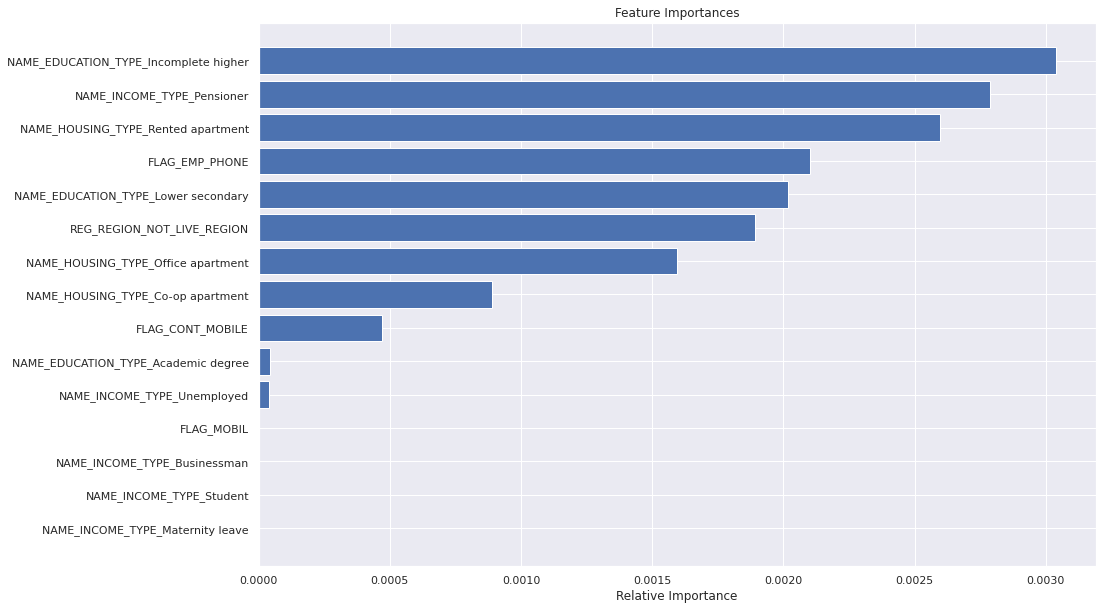

In [ ]:
# Which are the most important top-15 predictive features?
importances = model_rf.feature_importances_
indices = np.argsort(importances)[0:15]
features = X_train.columns
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- As we can see **Incomplete Higher Education** was rated very high among significant predictors of our model. This makes sense intuitively as individuals without a higher education, at a general level, are expected to have lesser paid jobs. Individuals with higher education degrees are at less risk of default.

- We can also see that Pensioners may have defaulted more among our data points. This might be because of an insufficient income to maintain expensive real estate.



Now that we have taken a look in general, at the predictive features, let us check out individual predictions from the test set.

***We will pick up one example each among different categories of predictions - TP,FP,TN,FN, and analyze why the model predicted them as such***

In [ ]:
# Capture the Predictions and the Ground Truths for the Random Forest Model in a dataframe
y_pred = model_rf.predict(X_test)
results_df = pd.DataFrame({'y_test':y_test,
                           'y_pred':y_pred})

In [ ]:
# Create separate dataframes for TP,FP,TN,FN predictions
results_df_TP = results_df[(y_test == 1) & (y_pred == 1)]
results_df_FN = results_df[(y_test == 1) & (y_pred == 0)]
results_df_TN = results_df[(y_test == 0) & (y_pred == 0)]
results_df_FP = results_df[(y_test == 0) & (y_pred == 1)]

Lets find out the specific observation number (indices) from the test set belonging to each of the above 4 categories of predictions. **This will help us pick examples of each later on to do SHAP analysis.**

In [ ]:
# True Positive indices from the test set
TP_indices = results_df_TP.index
TP_indices

Int64Index([156963, 271248, 299636, 206875, 291418, 101268, 123719,  29236,
            185229, 263899,
            ...
            226972, 274483,  88012, 149856, 292662, 298660,  22845,  83860,
            234844, 149027],
           dtype='int64', length=2929)

In [ ]:
# False Positive indices from the test set
FP_indices = results_df_FP.index
FP_indices

Int64Index([256571, 130646, 130549, 287975, 102173, 158289, 279469,  70481,
             22506, 209211,
            ...
            294188,  37768, 138005, 239927, 104934, 137914, 187237,  16213,
            234384, 268861],
           dtype='int64', length=21742)

In [ ]:
# True Negative indices from the test set
TN_indices = results_df_TN.index
TN_indices

Int64Index([191493, 103497, 211898, 144906, 187319, 245557, 277669,  38660,
             45988, 267663,
            ...
             81994, 248259,  50896, 123358, 226271, 133923, 271291, 208523,
             85131, 294620],
           dtype='int64', length=34796)

In [ ]:
# False Negative indices from the test set
FN_indices = results_df_FN.index
FN_indices

Int64Index([254495, 277517, 284987,  79045, 227168, 290126, 296697, 105145,
            116824, 214639,
            ...
            293418, 273925,  46500, 210273, 255858,  19734,  76235, 149268,
            142308, 169396],
           dtype='int64', length=2036)

#SHAP Analysis 

We will be using an excellent library known as SHAP for model interpretation. Below is a description on what SHAP is, as given in their [website](https://shap.readthedocs.io/en/latest/index.html) :

"**SHAP (SHapley Additive exPlanations)** is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions."

## Force Plots and Decision Plots

Both Force plots and Decision plots give us insights of what was the "model thinking under the hood" while classifying our observations. This is of course, a simple way of explaining SHAP analysis, actually it computes a whole array of shap values for each feature and each observation to explain the models.

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model_rf)

## True Positive Analysis (Correct Default Prediction)

In [ ]:
# SHAP Analysis for a True Positive observation
chosen_instance = X_test.loc[TP_indices[0]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

As we can see, the features such as DAYS_BIRTH, DAYS_ID_PUBLISH highly contributed to the positive classification. Although the other features like AMT_INCOME_TOTAL tried to bring down the probability of default, the force was higher in the direction of default prediction.

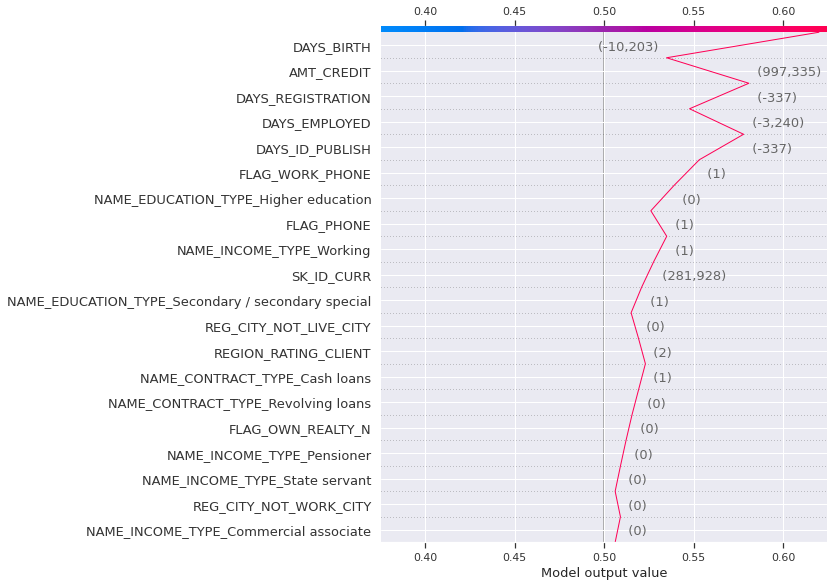

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

Decision plots provide similar information but in a different visual setting. Thes strongest features that affected the prediction are at the top. This plot helps us visualize the path taken by the model while classifying the observation based on different features.

## True Negative Analysis (Correct No-Default Prediction)

In [ ]:
# SHAP Analysis for a True Negative observation
chosen_instance = X_test.loc[TN_indices[0]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

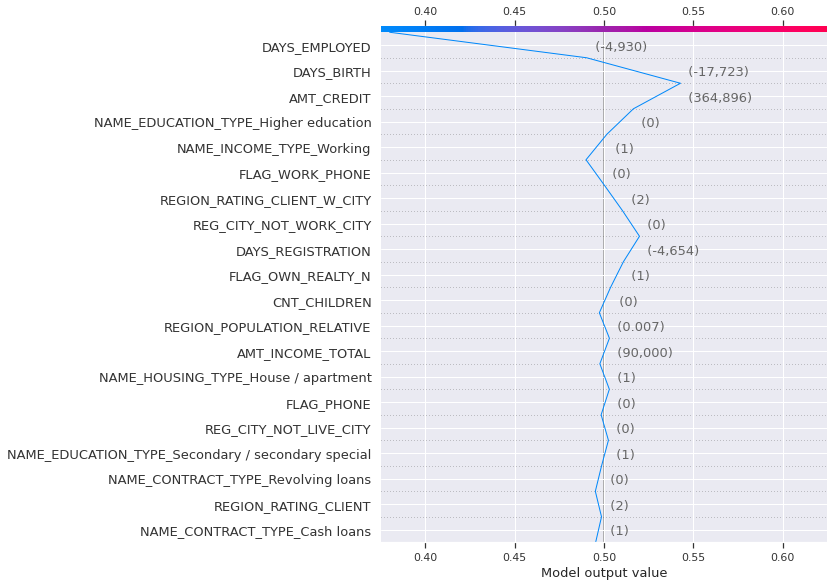

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

## False Positive Analysis (Incorrect Default Prediction)

In [ ]:
# SHAP Analysis for a False Positive observation
chosen_instance = X_test.loc[FP_indices[0]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

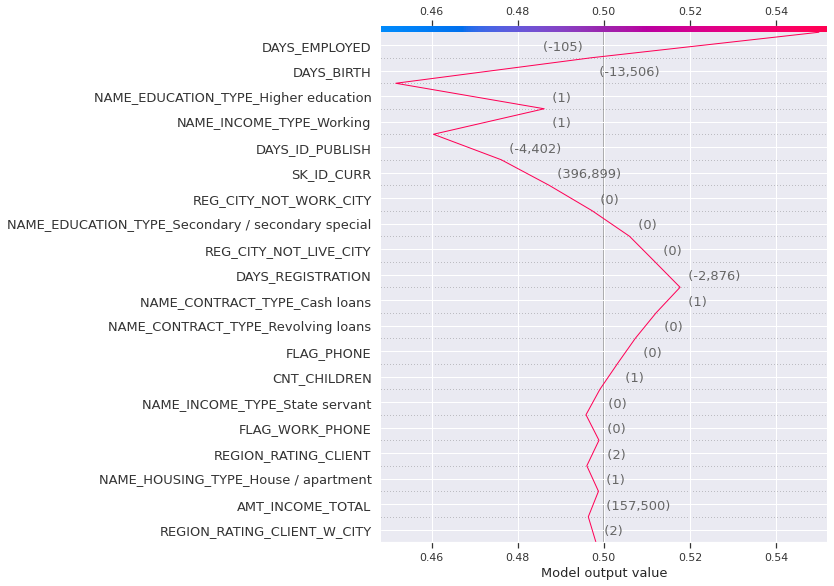

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

## False Negative Analysis (Incorrect No-Default Prediction)

In [ ]:
# SHAP Analysis for a False Negative observation
chosen_instance = X_test.loc[FN_indices[0]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

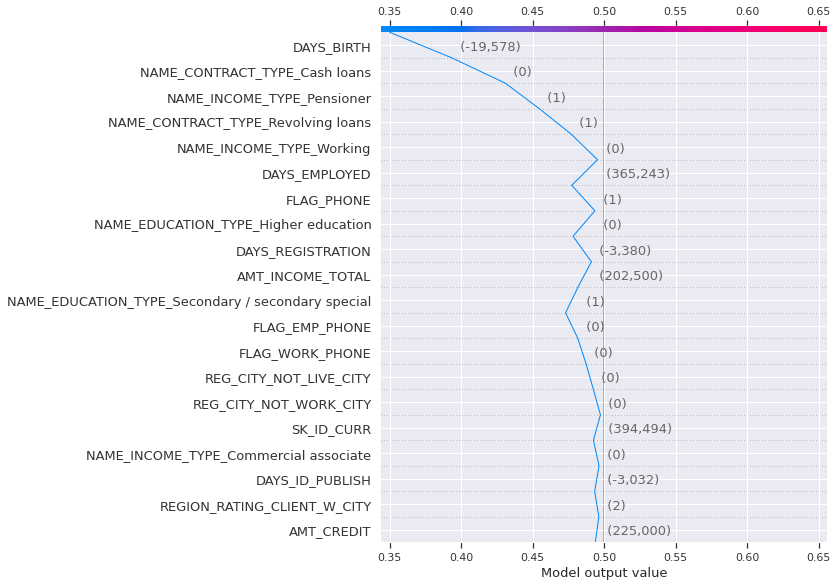

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

# Conclusion

In this project, we analyzed real home loan data to find out some of the strong features that are predictive of home loan default. Given below are some of the takeaways from this effort -

- The **insights from the SHAP analysis** can provide lending businesses an idea of feature importance, or which attributes influence loan default the most, based on actual data analysis. They can incorporate these feature importances as recommendations to consider credit eligibility.

- We addressed the problem of **imbalanced classification tasks** by showing some of the best practices. In general, below are some of the best practices that can be considered


1.   Performing **Stratified Split** to preserve class proportions across splits
2.   Consider **RepeatedStratifiedKFold** validation as it considers stratified folds during cross validation as well.
3.   Instead of **Accuracy** metric, focus on **Recall or Sensitivity** metric if your priority is to "detect" the minority class with more success.
4.   Consider using `class_weights` as `balanced` hyperparameter in model training when using imbalanced datasets.

- We gave due importance to the issue of **Ethics and Fairness in AI**. We refrained from using features like gender, marital status while constructing our model, so that our model is fair.

